# Flight Price Prediction

## Problem Statement

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Importing Libraries

In [267]:
import pandas as pd # for handling dataset
import numpy as np  # for mathematical computation

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

# for visualization 
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import seaborn as sns

import pickle

import warnings
warnings.filterwarnings('ignore')

In [268]:
# reading data
df1=pd.read_excel(r'D:\DATATRAINED\DTRND-Project\EVALUATION\3rd week\Flight_Ticket_Participant_Datasets\Data_Train.xlsx') 
df2=pd.read_excel(r'D:\DATATRAINED\DTRND-Project\EVALUATION\3rd week\Flight_Ticket_Participant_Datasets\Test_set.xlsx') 

In [269]:
df1.head() # to display top 5 rows from the train dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [270]:
df2.head() #  to display top 5 rows from the test dataset

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


#### Dataset Description

1. Airline: The name of the airline.

2. Date_of_Journey: The date of the journey

3. Source: The source from which the service begins.

4. Destination: The destination where the service ends.

5. Route: The route taken by the flight to reach the destination.

6. Dep_Time: The time when the journey starts from the source.

7. Arrival_Time: Time of arrival at the destination.

8. Duration: Total duration of the flight.

9. Total_Stops: Total stops between the source and destination.

10. Additional_Info: Additional information about the flight

11. Price: The price of the ticket

In [271]:
# to check number of rows & columns in train dataset
print('Total no of rows & columns in train dataset: ',df1.shape) 

# to check number of rows & columns in test dataset
print('Total no of rows & columns in test dataset: ',df2.shape)

Total no of rows & columns in train dataset:  (10683, 11)
Total no of rows & columns in test dataset:  (2671, 10)


In [272]:
# to display names of all the columns in train dataset
print('List of columns: ',df1.columns) 

# to display names of all the columns in test dataset
print('List of columns: ',df2.columns) 

List of columns:  Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')
List of columns:  Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


In [273]:
df1.info() # to know datatype of train columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [274]:
df2.info() # to know datatype of test columns 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [275]:
df1.describe().T # to get high understanding of train dataset 

,count,mean,std,min,25%,50%,75%,max
Price,10683.0,9087.064121,4611.359167,1759.0,5277.0,8372.0,12373.0,79512.0


In [276]:
df2.describe().T # to get overview/stats of test dataset

,count,unique,top,freq
Airline,2671,11,Jet Airways,897
Date_of_Journey,2671,44,9/05/2019,144
Source,2671,5,Delhi,1145
Destination,2671,6,Cochin,1145
Route,2671,100,DEL → BOM → COK,624
Dep_Time,2671,199,10:00,62
Arrival_Time,2671,704,19:00,113
Duration,2671,320,2h 50m,122
Total_Stops,2671,5,1 stop,1431
Additional_Info,2671,6,No info,2148


In [277]:
df1.isnull().sum()  # to check null values for train data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### Null values present in dataset (df1).

In [278]:
# treating null values
df1['Total_Stops']=df1['Total_Stops'].fillna(df1['Total_Stops'].mode()[0])
df1['Route']=df1['Route'].fillna(df1['Route'].mode()[0])

In [279]:
df1.isnull().sum()  # to check again null values for df1

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

#### No null values in df1

In [280]:
df2.isnull().sum()  # to check null values for test data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

#### No null values present in dataset (df2).

In [281]:
# to change format for train data
df1['Date_of_Journey']=pd.to_datetime(df1['Date_of_Journey'])
df1['Date_of_Journey']

0       2019-03-24
1       2019-01-05
2       2019-09-06
3       2019-12-05
4       2019-01-03
           ...    
10678   2019-09-04
10679   2019-04-27
10680   2019-04-27
10681   2019-01-03
10682   2019-09-05
Name: Date_of_Journey, Length: 10683, dtype: datetime64[ns]

In [282]:
# to change format for test data
df2['Date_of_Journey']=pd.to_datetime(df2['Date_of_Journey'])
df2['Date_of_Journey']

0      2019-06-06
1      2019-12-05
2      2019-05-21
3      2019-05-21
4      2019-06-24
          ...    
2666   2019-06-06
2667   2019-03-27
2668   2019-06-03
2669   2019-06-03
2670   2019-06-15
Name: Date_of_Journey, Length: 2671, dtype: datetime64[ns]

In [283]:
# splitting Date_of_Journey into Month and Day for train data
df1['Journey_Month']=df1['Date_of_Journey'].dt.month
df1['Journey_Day']=df1['Date_of_Journey'].dt.day

In [284]:
# splitting Date_of_Journey into Month and Day for test data
df2['Journey_Month']=df2['Date_of_Journey'].dt.month
df2['Journey_Day']=df2['Date_of_Journey'].dt.day

In [285]:
# dropping 'Date_of_Journey' column from train data
df1.drop('Date_of_Journey',axis=1,inplace=True)

In [286]:
# dropping 'Date_of_Journey' column from test data
df2.drop('Date_of_Journey',axis=1,inplace=True)

In [287]:
# splitting Arrival time for train data
df1["Arrival_hour"] = pd.to_datetime(df1['Arrival_Time']).dt.hour
df1["Arrival_min"] = pd.to_datetime(df1['Arrival_Time']).dt.minute
df1.drop(["Arrival_Time"],axis=1,inplace=True)

In [288]:
# splitting Arrival time for test data
df2["Arrival_hour"] = pd.to_datetime(df2['Arrival_Time']).dt.hour
df2["Arrival_min"] = pd.to_datetime(df2['Arrival_Time']).dt.minute
df2.drop(["Arrival_Time"],axis=1,inplace=True)

In [289]:
# dropping route column for train data as it is same as source to destination
df1=df1.drop(columns='Route')

In [290]:
# dropping route column for test dat as it is same as source to destination
df2=df2.drop(columns='Route')

In [291]:
# splitting Arrival time for train data
df1['Dep_hour']= pd.to_datetime(df1["Dep_Time"]).dt.hour
df1["Dep_min"] = pd.to_datetime(df1["Dep_Time"]).dt.minute
df1.drop(['Dep_Time'],axis=1,inplace=True)

In [292]:
# splitting Arrival time for test data
df2['Dep_hour'] = pd.to_datetime(df2["Dep_Time"]).dt.hour
df2["Dep_min"] = pd.to_datetime(df2["Dep_Time"]).dt.minute
df2.drop(['Dep_Time'],axis=1,inplace=True)

In [293]:
# categorizing hours into times of day
def tod(x):                    # defining function times of day as tod
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [294]:
df1['Arrival_Times_of_day']=df1['Arrival_hour'].apply(tod)
df1.drop(['Arrival_hour'],axis=1,inplace=True)

df2['Arrival_Times_of_day']=df2['Arrival_hour'].apply(tod)
df2.drop(['Arrival_hour'],axis=1,inplace=True)

In [295]:
# categorizing hours into times of day
def tod(x):                   # defining function times of day as tod
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [296]:
df1['Departure_Times_of_day']=df1['Dep_hour'].apply(pod)
df1.drop(['Dep_hour'],axis=1,inplace=True)

df2['Departure_Times_of_day']=df2['Dep_hour'].apply(pod)
df2.drop(['Dep_hour'],axis=1,inplace=True)

In [297]:
# to convert hour into minutes in train data
df1["Duration"]=df1["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [298]:
# to convert hour into minutes in test data
df2["Duration"]=df2["Duration"].str.replace("h","*60").str.replace(" ","+").str.replace("m","*1").apply(eval)

In [299]:
# to count unique values
df1['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [300]:
# to count unique values
df2['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [301]:
# appending duplicate values into one from train data
df1['Additional_Info']=df1['Additional_Info'].replace('No info','No Info',regex=True)
df1['Additional_Info']=df1['Additional_Info'].replace(['1 Long layover','2 Long layover','1 Short layover'],'Long layover',regex=True)
df1['Additional_Info']=df1['Additional_Info'].replace('Red-eye flight','No Info',regex=True)

In [302]:
# appending duplicate values into one from test data
df2['Additional_Info']=df2['Additional_Info'].replace('1 Long layover','Long layover',regex=True)

### Visualization

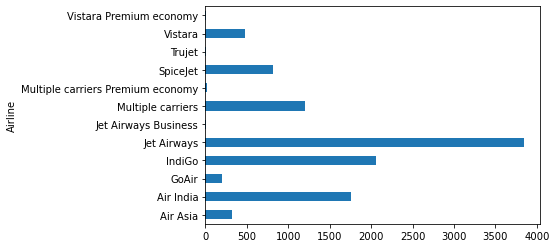

In [303]:
# to visualize 'Airline' column
df1.groupby('Airline')['Airline'].count().plot(kind='barh')
plt.show()

#### Passengers have preferred maximum Jet Airways for travelling.

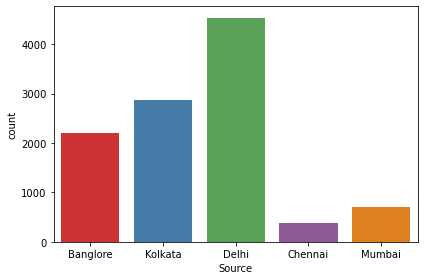

In [304]:
# to visualize Source column
sns.countplot('Source',data=df1,palette='Set1')
plt.tight_layout()

#### Mostly flights take off from Delhi and least from Chennai.

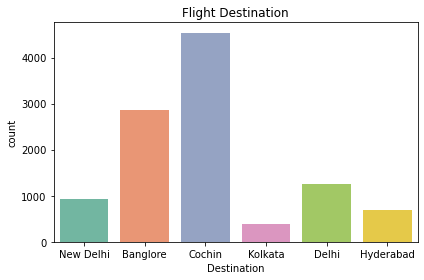

In [305]:
# to visualize Destination column
sns.countplot('Destination',data=df1,palette='Set2')
plt.title('Flight Destination')
plt.tight_layout()

#### Maximum flights lands at Cochin and least flights lands at Kolkata.

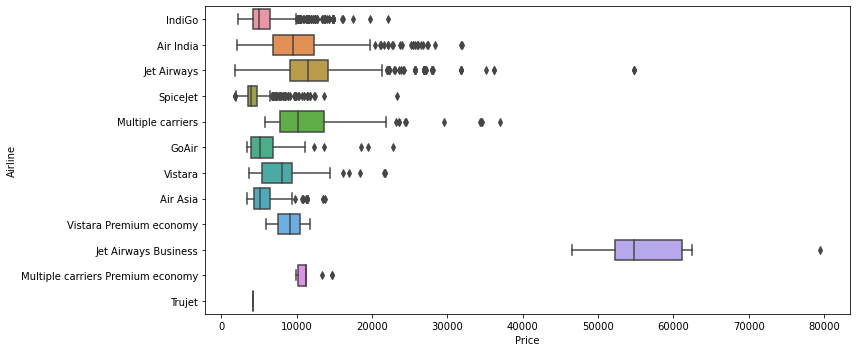

In [306]:
plt.figure(figsize=(12,5))
sns.boxplot(y='Airline', x='Price',data=df1)
plt.tight_layout()

#### Jet Airways Business flights is way more costlier than other flights.

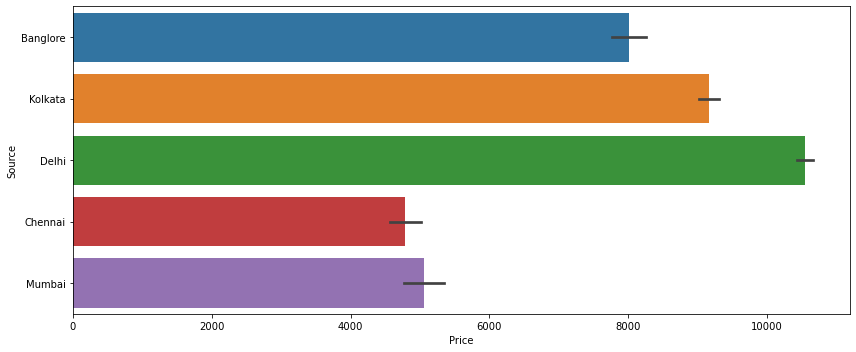

In [307]:
plt.figure(figsize=(12,5))
sns.barplot(y='Source', x='Price',data=df1)
plt.tight_layout()

#### The price of flight ticket from Delhi is much high than other cities.

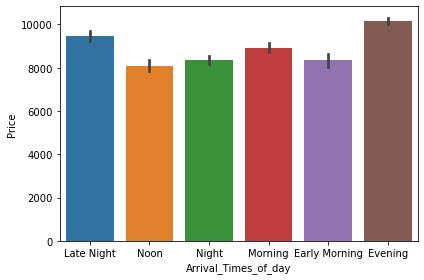

In [308]:
# to visualize 'Arrival_Times_of_day' vs 'Price'
sns.barplot(x='Arrival_Times_of_day',y='Price',data=df1)
plt.tight_layout()

#### Price of flight ticket in evening is costlier and cheap in early morning when boarding to destination.

In [309]:
last_column = df1.pop('Price')
df1.insert(12, 'Price', last_column)  # inserting price at the last column as its our target/label

In [310]:
from sklearn.preprocessing import LabelEncoder

In [311]:
# converting objects into integers of train data
lab_enc = LabelEncoder()
list1 = ['Airline', 'Source', 'Destination','Total_Stops', 'Additional_Info','Arrival_Times_of_day','Departure_Times_of_day']
for val in list1:
    df1[val] = lab_enc.fit_transform(df1[val].astype(str))

In [312]:
# converting objects into integers of train data
lab_enc = LabelEncoder()
list1 = ['Airline', 'Source', 'Destination','Total_Stops', 'Additional_Info','Arrival_Times_of_day','Departure_Times_of_day']
for val in list1:
    df2[val] = lab_enc.fit_transform(df2[val].astype(str))

In [314]:
# checking if all features has transformed into machine language
df1.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_Month,Journey_Day,Arrival_min,Dep_min,Arrival_Times_of_day,Departure_Times_of_day,Price
0,3,0,5,170,4,4,3,24,10,20,2,4,3897
1,1,3,0,445,1,4,1,5,15,50,5,0,7662
2,4,2,1,1140,1,4,9,6,25,25,2,3,13882
3,3,3,0,325,0,4,12,5,30,5,4,1,6218
4,3,0,5,285,0,4,1,3,35,50,4,5,13302


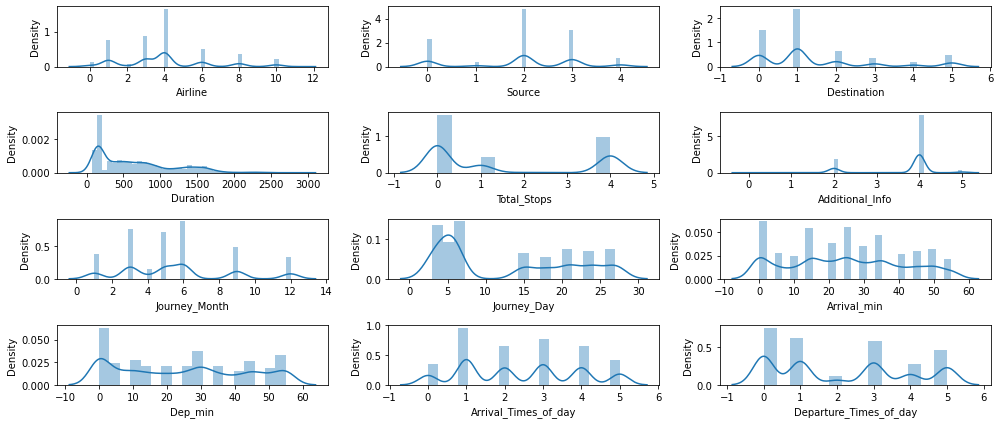

In [315]:
# to visualize columns
plt.figure(figsize=(14,6), facecolor='white')
plotnumber=1
for column in df1:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(df1[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

#### Skewness can be seen in Duration 

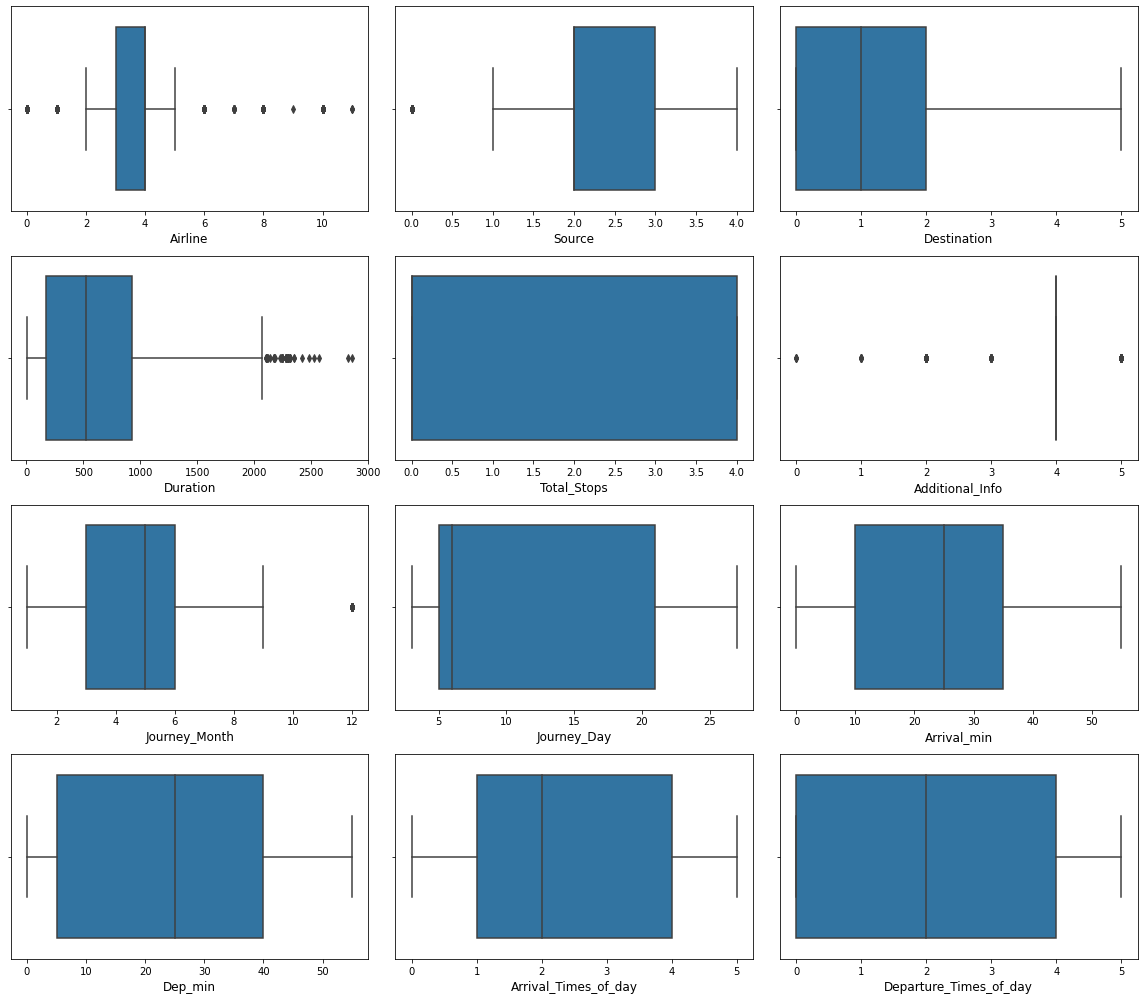

In [317]:
# Lets visualize the columns in boxplot to check outliers
plt.figure(figsize=(16,14))
plot=1
for col in df1:
    if plot<=12:
        plt.subplot(4,3,plot)
        sns.boxplot(df1[col])
        plt.xlabel(col,fontsize=12)
        plot=plot+1
plt.tight_layout()

In [318]:
# Using 1.5 IQR method to remove outliers

def outlier(df,col):
    lower_boundary=df[col].mean()-1.5*df[col].std()
    upper_boundary=df[col].mean()+1.5*df[col].std()
    print(lower_boundary,upper_boundary)
    df.loc[df[col]> upper_boundary,col] = upper_boundary
    df.loc[df[col]<lower_boundary,col]=lower_boundary

In [320]:
outlier(df1,'Duration')

-118.69976908472097 1404.8862335609915


<AxesSubplot:xlabel='Duration'>

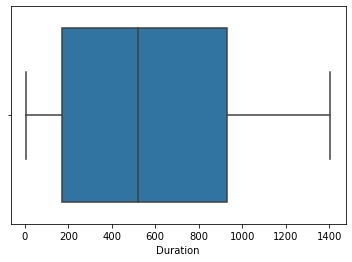

In [321]:
# After removal of outlier
sns.boxplot(df1['Duration'])

In [324]:
# to see skewness for every column stored in train data
for col in df1:
    print(col)
    print(skew(df1[col]))

Airline
0.7309920677814893
Source
-0.42399470907819437
Destination
1.2439947401585096
Duration
0.5462456096111994
Total_Stops
0.6315920513566712
Additional_Info
-1.406327139162816
Journey_Month
0.6294511111830461
Journey_Day
0.3673210836873798
Arrival_min
0.11092928343457525
Dep_min
0.16700560413798504
Arrival_Times_of_day
0.12606017851207318
Departure_Times_of_day
0.27901729849668416
Price
1.8122978678177029


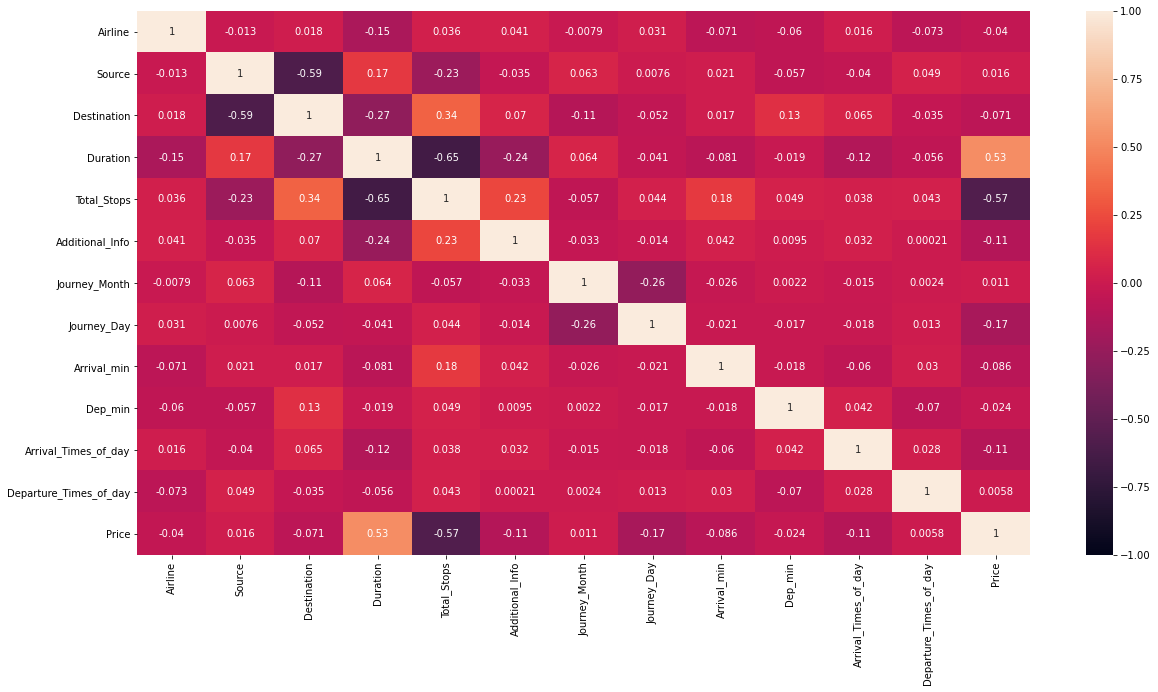

In [325]:
# plotting heatmap to observe the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), annot=True, vmin=-1.0, vmax=1.0)
plt.show()

#### Duration is only having good relation with target(price) and rest most of them are negatively corelated.

In [326]:
y = df1['Price']
X = df1.drop('Price', axis = 1)

In [327]:
# Data Scaling.  Formula Z=(x-mean)/std
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [328]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif["features"] = X.columns

#let's check the values
vif

,vif,features
0,1.049030,Airline
1,1.551158,Source
2,1.710878,Destination
3,1.853546,Duration
4,1.915628,Total_Stops
5,1.075900,Additional_Info
6,1.095053,Journey_Month
7,1.092509,Journey_Day
8,1.050425,Arrival_min
9,1.029371,Dep_min


#### No Multi-Collinearity problem exists.

In [329]:
# Split data into train and test. Model will be built on training data and tested on test data
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25, random_state = 101)

In [330]:
y_train.head()

5871     5912
8322    12192
5601     4482
5778     5298
7724    27992
Name: Price, dtype: int64

### Linear Regression

In [331]:
regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [334]:
# Adjusted R2 score
regression.score(x_train,y_train)

0.4231811657935399

In [335]:
# lets check how well model fits the test data
regression.score(x_test,y_test)

0.4180946613331006

In [336]:
# To cross verify
y_pred = regression.predict(x_test)

In [337]:
r2_score(y_test,y_pred)

0.4180946613331006

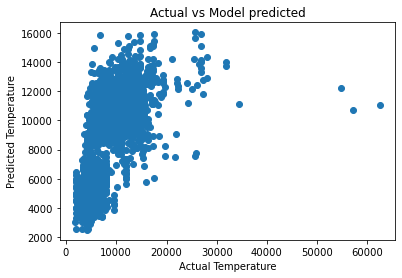

In [338]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Model predicted')
plt.show()

In [339]:
mean_absolute_error(y_test,y_pred)

2442.457204922101

In [340]:
mean_squared_error(y_test,y_pred)

12483919.133841803

In [341]:
np.sqrt(mean_squared_error(y_test,y_pred))

3533.2589961453155

In [342]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(regression,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.42375471 0.42478345 0.43604567 0.41958039 0.39907913]
0.4206486693260886
0.012084682697823984


## Using Regularization method to check whether our regression model is overfitting or not

In [343]:
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

### Lasso Regularization

In [344]:
# LassoCV will return best alpha after max iteration
# Normalize is subtracting the mean and dividingby the l2-norm
lasscv = LassoCV(alphas = None, max_iter = 1000, normalize = True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [345]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.06349227405747809

In [346]:
# now that we have best parameter, lets use Lasso regression and see how well our data has fitted before
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.06349227405747809)

In [347]:
lasso_reg.score(x_test,y_test)

0.41809410242899114

### Using Ridge regression model

In [348]:
# RidgeCV will return best alpha and coefficients after performing 10 cross validations.
ridgecv = RidgeCV(alphas = np.arange(0.001,0.1,0.01),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [349]:
ridgecv.alpha_

0.001

In [350]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.001)

In [351]:
ridge_model.score(x_test,y_test)

0.41809466206708545

#### So we can see by using different type of regularization,we still are getting almost same r2 score. That means our linear regression model has been well trained over the training data and there is no overfitting.

### Decision Tree Regressor

In [352]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {dt_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = dt_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {dt_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 99.58%
______________________________________________

===================Test Result======================
Accuracy Score: 75.45%
______________________________________________


In [353]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(dt_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.81080172 0.8106949  0.74947895 0.83725226 0.80023397]
0.8016923623731401
0.028833660492251372


### Random Forest Regressor

In [354]:
rand_reg = RandomForestRegressor(n_estimators = 100,random_state=51)
rand_reg.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {rand_reg.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = rand_reg.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {rand_reg.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 97.89%
______________________________________________

===================Test Result======================
Accuracy Score: 84.41%
______________________________________________


In [355]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(rand_reg,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.85643077 0.86920555 0.8899586  0.89852995 0.85231648]
0.8732882700752004
0.018197263796252375


### KNN Regressor

In [368]:
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

print("\n===================Train Result======================")

print(f"Accuracy Score: {knn.score(x_train,y_train) * 100:.2f}%")
print("______________________________________________")

#*********************** Test Score *************************

y_pred = knn.predict(x_test)
print("\n===================Test Result======================")
print(f"Accuracy Score: {knn.score(x_test,y_test) * 100:.2f}%")
print("______________________________________________")


===================Train Result======================
Accuracy Score: 85.10%
______________________________________________

===================Test Result======================
Accuracy Score: 72.76%
______________________________________________


In [369]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(knn,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.71687326 0.74543903 0.73711497 0.70240451 0.67763957]
0.7158942679102654
0.024370327063339164


### Gradient Boosting Regressor

In [358]:
from sklearn.ensemble import GradientBoostingRegressor
np.random.seed(42)

gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

y_preds = gbr.predict(x_test)
y_preds

gbr.score(x_test, y_test)

0.8092342133242695

In [359]:
# Cross Validation score to check if the model is overfitting or underfitting
score= cross_val_score(gbr,X_scaled,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.80103107 0.80241601 0.83115338 0.81413371 0.81424622]
0.8125960761157387
0.010833687954723165


In [ ]:
# Gradient Boosting Regressor is our best model because difference between accuracy and CV score is least than other models.

### Using GridSearchCV for hyper parameter tuning on best model (Gradient Boosting Regressor )

In [370]:
# we are tuning three hyperparameters right now, we are passing different values for both parameters
grid_param = {
    'max_depth' : range(2,20,3),              
    'min_samples_leaf' : range (1,20,2),
    'min_samples_split' : range (2,20,2)
}

In [371]:
grid_search = GridSearchCV(estimator=gbr,
                          param_grid=grid_param,
                          cv=3,
                          n_jobs =-1)

In [372]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 20, 3),
                         'min_samples_leaf': range(1, 20, 2),
                         'min_samples_split': range(2, 20, 2)})

In [373]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'max_depth': 11, 'min_samples_leaf': 7, 'min_samples_split': 16}


In [374]:
gbr = GradientBoostingRegressor(max_depth =11, min_samples_leaf=7, min_samples_split=16)
gbr.fit(x_train,y_train)

GradientBoostingRegressor(max_depth=11, min_samples_leaf=7,
                          min_samples_split=16)

In [376]:
gbr.score(x_test,y_test)

0.8605866223498053

In [377]:
# After applying hyper parameter tuning accuracy decreased by 2%.

### Model Saving

In [378]:
# saving the model to local system
filename = 'Flight_price_prediction.pickle'
pickle.dump(gbr,open(filename,'wb'))

In [379]:
# Model has been saved successfully. Let's check by predicting with the loaded model.

### Loading and predicting with the loaded model

In [381]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
test_pred=loaded_model.predict(df2)

In [382]:
# Saving the prediction file
df2['Prediction_price'] = test_pred
df2.to_csv('submit_file.csv',index=False)